In [27]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [28]:
df=pd.read_csv("/content/Social_Network_Ads.csv")
X =df[["Age","EstimatedSalary"]]
y =df.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
class SVM:
    def __init__(self, learning_rate=0.01, epochs=10):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.w = None
        self.b = None

    def fit(self, X, y):
        m, n = X.shape
        self.w = np.zeros(n)
        self.b = 0

        for epoch in range(self.epochs):
            for i in range(m):
                if y.iloc[i] * (X.iloc[i] @ self.w + self.b) <= 1:
                    self.w += self.learning_rate * (y.iloc[i] * X.iloc[i] - 2 * self.w)
                    self.b += self.learning_rate * y.iloc[i]

    def predict(self, X):
        return np.sign(X @ self.w + self.b)

In [30]:
model = SVM(learning_rate=0.01, epochs=50)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [18]:
y_pred_labels = (y_pred + 1) // 2
y_test_labels=(y_test +1)//2

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report:               precision    recall  f1-score   support

           0       0.00      0.00      0.00        99
           1       0.36      1.00      0.53        55

    accuracy                           0.36       154
   macro avg       0.18      0.50      0.26       154
weighted avg       0.13      0.36      0.19       154



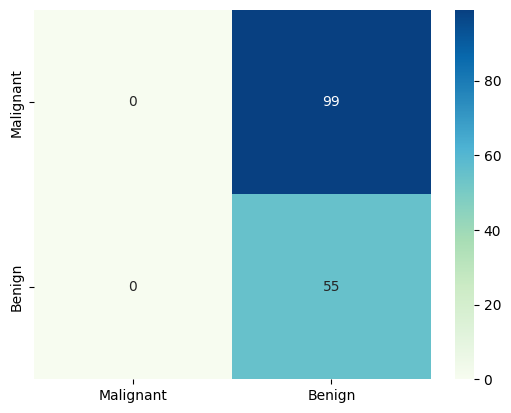

In [19]:
classificationreport=classification_report(y_test_labels,y_pred_labels)
print('Classification Report:',classificationreport)
confmat=confusion_matrix(y_test_labels,y_pred_labels)
sns.heatmap(confmat,annot=True,fmt='d',cmap='GnBu',xticklabels=['Malignant','Benign'],yticklabels=['Malignant','Benign'])
plt.show()